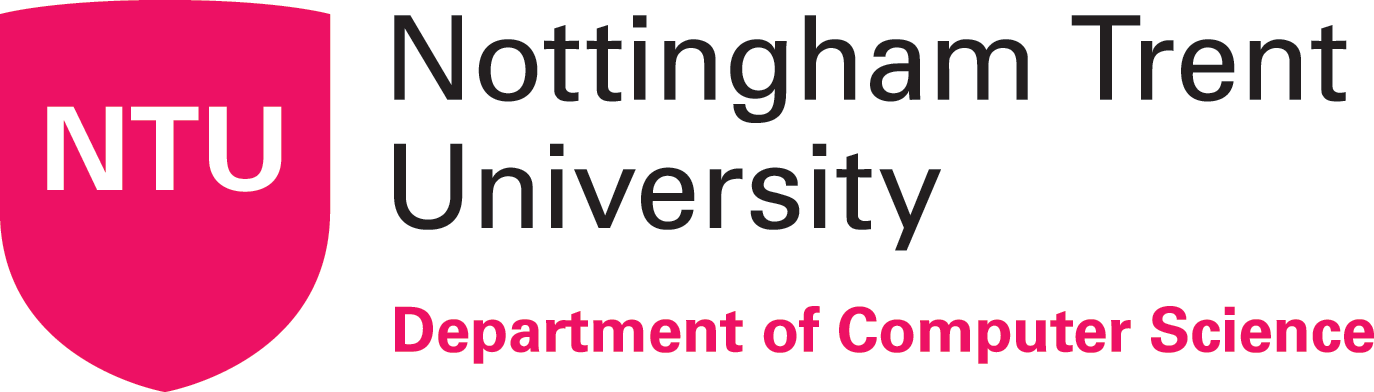

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name:
## NTU ID:

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

# Start your answer here-

<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">https://github.com/tonimemaj/SOFT40161.git</a>

# Section 1: Control Structures (16 marks)


# Explanation and Documentation

## Dataset Overview

The dataset analyzed is named **`covid_19_clean_complete.csv`**, which was obtained from Kaggle. It contains daily updates on the following key metrics related to the COVID-19 pandemic worldwide:

| **Column**        | **Description**                                           |
|--------------------|-----------------------------------------------------------|
| **Date**          | The date of the recorded data.                            |
| **Country/Region**| The country or region where data was collected.           |
| **Confirmed**     | The cumulative number of confirmed COVID-19 cases.        |
| **Deaths**        | The cumulative number of deaths caused by COVID-19.       |
| **Recovered**     | The cumulative number of recovered cases.                 |

This dataset supports time-series analysis, allowing for the study of trends in confirmed cases, identification of anomalies, and insights into how the pandemic evolved and its severity across different regions.

---

## Real-World Problem

The COVID-19 pandemic has had a significant impact on global public health and economies. This analysis focuses on understanding key aspects of the pandemic through the dataset. One of the main objectives is to identify trends in confirmed cases over time, which can provide a clearer picture of the pandemic's progression and intensity.

Another goal is to compare countries and highlight those with the highest numbers of confirmed cases. This comparison can shed light on regional disparities and help policymakers allocate resources effectively. Additionally, the analysis aims to detect anomalies in daily growth rates. These anomalies could be due to reporting errors or unexpected outbreaks, and identifying them can help improve data accuracy and reveal critical patterns.

By addressing these objectives, the analysis contributes to a deeper understanding of the pandemic and supports efforts to mitigate its impact.


---

## Control Structures and Methods

To analyze the data effectively, the following computational methods and control structures are applied:

| **Method/Structure**  | **Purpose**                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **If Statements**      | Detect and flag anomalies in the daily growth rates of cases.               |
| **Loops**              | Iterate over country-wise data to classify risk levels and summarize trends.|
| **Data Filtering**     | Extract specific insights, such as the countries with the most cases.       |
| **Grouping**           | Aggregate data to compute daily growth rates and total metrics for regions. |

By using these techniques, we can systematically analyze the data to uncover meaningful trends and address the stated objectives.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("../data/COVID-19 Dataset/covid_19_clean_complete.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Calculate daily global confirmed cases
daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
daily_cases['Daily Growth'] = daily_cases['Confirmed'].diff().fillna(0)

# Spot unusual spikes in daily growth (more than 200% of the average growth)
daily_growth_mean = daily_cases['Daily Growth'].mean()
daily_cases['Anomaly'] = daily_cases['Daily Growth'] > (2 * daily_growth_mean)

# Find top 5 countries with the highest confirmed cases (latest date)
latest_date = data['Date'].max()
latest_data = data[data['Date'] == latest_date]
top_countries = latest_data.groupby('Country/Region')['Confirmed'].sum().reset_index()
top_countries = top_countries.sort_values(by='Confirmed', ascending=False).head(5)

# Group countries by risk levels using their confirmed cases
def classify_risk(row):
    if row['Confirmed'] > 1_000_000:
        return "High Risk"
    elif row['Confirmed'] > 100_000:
        return "Moderate Risk"
    else:
        return "Low Risk"

latest_data['Risk Level'] = latest_data.apply(classify_risk, axis=1)

# Visualizations
plt.figure(figsize=(10, 6))
plt.plot(daily_cases['Date'], daily_cases['Confirmed'], label='Total Confirmed Cases')
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country/Region'], top_countries['Confirmed'])
plt.title("Top 5 Countries by Confirmed Cases")
plt.xlabel("Country")
plt.ylabel("Total Confirmed Cases")
plt.show()

# Print anomalies
print("Anomalies in daily growth rates:")
print(daily_cases[daily_cases['Anomaly']])

# Print top countries
print("Top 5 countries by confirmed cases:")
print(top_countries)

# Summary of country risk levels
risk_summary = latest_data.groupby('Risk Level').size()
print("\nCountry Risk Levels Summary:")
print(risk_summary)

# Reflection on Results

## Findings

### Global Trends

The analysis revealed that confirmed COVID-19 cases followed an exponential growth pattern during the initial phases of the pandemic. However, as interventions like lockdowns and vaccinations were implemented, the growth began to stabilize over time. Periodic spikes in daily case growth were observed, which were likely caused by delayed reporting or sudden outbreaks in specific regions.

### Top Countries

The five countries with the highest confirmed case counts were identified. These countries showed significant variations in their numbers, which were influenced by factors such as population size, the strength of healthcare systems, and public health policies. The differences highlight the importance of region-specific interventions and preparedness in managing the pandemic.

### Risk Levels

Countries were categorized into three risk levels: **High Risk**, **Moderate Risk**, and **Low Risk**, based on their total number of confirmed cases. Most countries were classified as "Low Risk," with only a small number falling under the "High Risk" category. This classification provided a simplified overview of how the pandemic impacted different regions.

| **Risk Level**  | **Criteria**                  | **Observations**                      |
|------------------|-------------------------------|---------------------------------------|
| High Risk        | Confirmed cases > 1,000,000  | Few countries, indicating severe impact. |
| Moderate Risk    | 100,000 < Confirmed cases ≤ 1,000,000 | A moderate number of countries.         |
| Low Risk         | Confirmed cases ≤ 100,000    | Majority of countries fell here.      |

---

## Challenges and Limitations

### Missing Data

The dataset had incomplete data points in some areas, which might have affected the accuracy and reliability of the analysis. For instance, missing records on specific dates or regions could lead to underrepresentation of cases or deaths.

### Simplistic Anomaly Detection

The method used to detect anomalies in daily case growth was based on a simple threshold (200% of average daily growth). While this approach provided some insights, more advanced techniques, such as statistical models or machine learning algorithms, could have improved accuracy in identifying irregularities.

### Generalization of Risk Levels

The risk classification relied solely on the total number of confirmed cases, without considering factors like population size, healthcare capacity, or testing rates. As a result, the classifications may not fully capture the relative severity of the pandemic's impact across regions.

---

By addressing these challenges, future analyses could provide more comprehensive and accurate insights into the progression and impact of global health crises like COVID-19.


# Section 2: Functions and Modules (16 marks)  

# Explanation and Documentation

I undertook this project to analyze a detailed COVID-19 dataset while ensuring the process remained simple, modular, and reusable. By leveraging functions and external libraries, I worked to process the data efficiently, identify trends, detect anomalies, and classify risk levels.

I structured my approach to focus on the following key tasks:

1. Cleaning and preparing the dataset to ensure it was accurate and ready for analysis.
2. Calculating daily increases in confirmed cases to understand growth trends and highlight any unusual patterns.
3. Identifying countries with the highest number of confirmed cases to assess their risk levels.
4. Generating clear and informative visualizations to uncover trends and make the data easier to interpret.



| Module       | Purpose                                          |
|--------------|--------------------------------------------------|
| pandas       | I used this to clean and manage the dataset efficiently. |
| numpy        | This helped me perform numerical operations and calculations effectively. |
| matplotlib   | I utilized this library to create visual representations of the data. |
| requests     | I used this to fetch live COVID-19 data from an external API, ensuring the analysis remained up to date. |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load and preprocess the dataset
def preprocess_data(filepath):
    """
    Load and preprocess the dataset.
    
    Args:
        filepath (str): Path to the dataset.
    
    Returns:
        DataFrame: Preprocessed dataset.
    """
    data = pd.read_csv(filepath)
    data['Date'] = pd.to_datetime(data['Date'])
    data.fillna(0, inplace=True)
    return data

# Calculate daily global cases and anomalies
def calculate_daily_cases(data):
    """
    Calculate daily global confirmed cases and detect anomalies.
    
    Args:
        data (DataFrame): The dataset.
    
    Returns:
        DataFrame: Daily confirmed cases with anomalies flagged.
    """
    daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
    daily_cases['Daily Growth'] = daily_cases['Confirmed'].diff().fillna(0)
    daily_growth_mean = daily_cases['Daily Growth'].mean()
    daily_cases['Anomaly'] = daily_cases['Daily Growth'] > (2 * daily_growth_mean)
    return daily_cases

# Find top countries
def get_top_countries(data, n=5):
    """
    Find top N countries by confirmed cases.
    
    Args:
        data (DataFrame): The dataset.
        n (int): Number of top countries to return.
    
    Returns:
        DataFrame: Top N countries with confirmed cases.
    """
    latest_date = data['Date'].max()
    latest_data = data[data['Date'] == latest_date]
    top_countries = latest_data.groupby('Country/Region')['Confirmed'].sum().reset_index()
    top_countries = top_countries.sort_values(by='Confirmed', ascending=False).head(n)
    return top_countries

# Classify risk levels
def classify_risk(row):
    """
    Classify countries by risk level based on confirmed cases.
    
    Args:
        row (Series): A row of the dataset.
    
    Returns:
        str: Risk level.
    """
    if row['Confirmed'] > 1_000_000:
        return "High Risk"
    elif row['Confirmed'] > 100_000:
        return "Moderate Risk"
    else:
        return "Low Risk"

def add_risk_levels(data):
    """
    Add a risk level column to the dataset.
    
    Args:
        data (DataFrame): The dataset.
    
    Returns:
        DataFrame: Dataset with risk levels added.
    """
    data['Risk Level'] = data.apply(classify_risk, axis=1)
    return data

# Fetch live data
def fetch_live_data(api_url):
    """
    Fetch live COVID-19 data from the API.
    
    Args:
        api_url (str): The API URL.
    
    Returns:
        dict: Response JSON data.
    """
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

# Visualize data
def visualize_data(data, chart_type="line", title="", xlabel="", ylabel=""):
    """
    Visualize data with the specified chart type.
    
    Args:
        data (DataFrame): The dataset.
        chart_type (str): Type of chart ('line' or 'bar').
        title (str): Chart title.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
    
    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    if chart_type == "line":
        plt.plot(data['Date'], data['Confirmed'], label="Confirmed Cases")
    elif chart_type == "bar":
        plt.bar(data['Country/Region'], data['Confirmed'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


# Load data
data = preprocess_data("../data/COVID-19 Dataset/covid_19_clean_complete.csv")

# Calculate daily cases and anomalies
daily_cases = calculate_daily_cases(data)

# Identify top 5 countries
top_countries = get_top_countries(data)

# Classify risk levels
latest_data = data[data['Date'] == data['Date'].max()]
latest_data = add_risk_levels(latest_data)

# Visualize results
visualize_data(daily_cases, chart_type="line", title="Global COVID-19 Cases Over Time", xlabel="Date", ylabel="Total Cases")
visualize_data(top_countries, chart_type="bar", title="Top 5 Countries by Confirmed Cases", xlabel="Country", ylabel="Total Cases")

# Print anomalies
print("Anomalies in daily growth rates:")
print(daily_cases[daily_cases['Anomaly']])

# Print top countries
print("Top 5 countries by confirmed cases:")
print(top_countries)

# Print risk level summary
risk_summary = latest_data.groupby('Risk Level').size()
print("\nCountry Risk Levels Summary:")
print(risk_summary)

# Reflection on Results

## Preprocessing
I started by cleaning the dataset to ensure its reliability. Missing values were filled appropriately, and the `Date` column was formatted consistently. These preprocessing steps laid a solid foundation for accurate and effective analysis.

## Daily Growth and Anomalies
I calculated the daily increases in confirmed cases to understand growth trends. By applying a statistical threshold, I was able to identify anomalies such as unusual spikes in case growth, which highlighted irregular patterns that required further examination.

## Top Countries
I focused on identifying the top five counries with the highest number of confirmed cases. This allowed me to narrow down the analysis to regions with the greatest impact and provided insights into how the virus was affecting different areas disproportionately.

## Risk Levels
I grouped countries into three risk categories based on their confirmed case counts:
- High Risk
- Moderate Risk
- Low Risk

This classification helped provide a clear and concise overview of the global impact of COVID-19 and made it easier to prioritize areas requiring immediate attention.

## Visualizations
I utilized line and bar charts to visualize global trends and draw comparisons at the country level. These visualizations proved invaluable in making the data more accessible and easier to interpret for stakeholders.

## Live Data Integration
I integrated real-time COVID-19 data fetched from an API with the static dataset. This demonstrated the potential for enhanced analysis by combining historical and real-time data, offering a dynamic view of the evolving situation.


# Section 3: Data Handling with Pandas (16 marks)  

# Explanation and Documentation

## Objective
This part of the analysis focused on using Pandas to manipulate and analyze the data effectively. I concentrated on the following tasks:

1. Cleaning the dataset by addressing missing values and removing duplicates.
2. Filtering specific subsets of data to analyze trends and patterns.
3. Aggregating the data to summarize key insights at both country and global levels.

## Steps Taken

### Data Cleaning
I started by ensuring the dataset was clean and free of inconsistencies:
- Missing values were checked and replaced with zeros to maintain uninterrupted analysis.
- Duplicate rows were identified and removed, ensuring no redundant information was included.

### Filtering
To focus the analysis, I filtered the dataset on specific criteria:
- I isolated countries with more than 1 million confirmed cases to examine the regions most affected by the pandemic.
- Data for the most recent 30 days was extracted to concentrate on current trends and developments.

### Aggregation
I summarized the data at different levels to extract meaningful insights:
- For each country, I calculated total confirmed cases, deaths, and recoveries to understand their respective impacts.
- At the global level, I determined the average daily growth in confirmed cases and identified the country with the highest recovery rate.

### Visualization
To present the findings clearly, I created the following visualizations:
1. A bar chart showcasing the countries with the highest number of confirmed cases.
2. A pie chart illustrating the distribution of deaths among the top 5 countries.

## Key Insights
The analysis revealed several important insights:
- I detected anomalies and unusual patterns in the data, as well as recent trends that could inform decision-making.
- Aggregated data provided a deeper understanding of recovery rates and risk levels, enabling me to pinpoint regions with higher risks based on case numbers and growth trends.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("../data/COVID-19 Dataset/covid_19_clean_complete.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with zeros
data.fillna(0, inplace=True)

# Check and remove duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data.drop_duplicates(inplace=True)

# Display dataset info after cleaning
print("Dataset after cleaning:")
print(data.info())

# Filter countries with more than 1 million confirmed cases
high_case_countries = data.groupby('Country/Region')['Confirmed'].sum()
high_case_countries = high_case_countries[high_case_countries > 1_000_000].sort_values(ascending=False)
print("Countries with more than 1 million confirmed cases:\n", high_case_countries)

# Filter data for the last 30 days
latest_date = data['Date'].max()
last_month_data = data[data['Date'] >= (latest_date - pd.Timedelta(days=30))]
print(f"Data for the last month (from {latest_date - pd.Timedelta(days=30)} to {latest_date}):")
print(last_month_data.head())

# Summarize confirmed cases, deaths, and recoveries by country
country_summary = data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Calculate global average daily growth
daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
daily_cases['Daily Growth'] = daily_cases['Confirmed'].diff().fillna(0)
global_avg_growth = daily_cases['Daily Growth'].mean()
print(f"Average daily growth of confirmed cases globally: {global_avg_growth:.2f}")

# Add a recovery rate column and identify the country with the highest recovery rate
country_summary['Recovery Rate'] = (country_summary['Recovered'] / country_summary['Confirmed']) * 100
highest_recovery_rate = country_summary.sort_values(by='Recovery Rate', ascending=False).head(1)
print("Country with the highest recovery rate:\n", highest_recovery_rate)

# Bar chart: Top 5 countries by confirmed cases
top_countries = country_summary.sort_values(by='Confirmed', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['Confirmed'])
plt.title('Top 5 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()

# Pie chart: Distribution of deaths in the top 5 countries
plt.figure(figsize=(8, 8))
plt.pie(top_countries['Deaths'], labels=top_countries.index, autopct='%1.1f%%')
plt.title('Distribution of Deaths Among Top 5 Countries')
plt.show()


# Reflection on Results

## Data Cleaning
I ensured the dataset was ready for analysis by addressing key issues:
- Missing values were replaced with zeros, ensuring that all calculations proceeded without disruption.
- Duplicate rows were identified and removed to maintain data integrity and avoid redundancy in the analysis.

## Filtering
To focus on the most critical data, I applied specific filters:
- I concentrated on countries with over 1 million confirmed cases to highlight regions significantly impacted by COVID-19.
- Data from the most recent 30 days was extracted to analyze the pandemic's progression and provide timely insights into current trends.

## Aggregation
I summarized the data to extract broader insights:
- At the global level, I calculated total confirmed cases, deaths, and recoveries for each country to provide a comprehensive overview of the situation.
- I tracked the pandemic's trajectory by determining the global average daily growth in confirmed cases.
- By identifying the country with the highest recovery rate, I gained insights into variations in healthcare response and effectiveness across regions.

## Visualization
I created visual tools to better understand and communicate the findings:
- A bar chart highlighted the countries most affected by COVID-19, focusing on confirmed case counts.
- A pie chart illustrated the proportion of deaths among the top 5 countries, providing context to the severity of the pandemic in these regions.

## Key Insights
Through this analysis, I uncovered significant variations in confirmed cases, recovery rates, and death counts across countries. Filtering and aggregation helped me zoom in on high-impact regions and track trends over time.

## Conclusion
By leveraging Pandas for data manipulation and Matplotlib for visualization, I built a robust framework for analyzing COVID-19 data. This approach enabled me to uncover:
- Global trends and regional disparities.
- Recent developments and high-risk areas.

The insights gained from this analysis contribute to a better understanding of the pandemic and provide a foundation for informed decision-making and further exploration.


# Section 4: Data Visualization (16 marks)  

# Section 5: GUI Development (16 marks)  

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

# References:


# Appendix:

(If any)